Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

# Importing the Libraries

In [887]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#1.Read the dataset to the python environment.

In [888]:
iris_Data=pd.read_excel('/content/iris.xls')

In [889]:
iris_Data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [890]:
iris_Data.shape

(150, 5)

In [891]:
iris_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [892]:
iris_Data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [893]:
irisData=iris_Data

In [894]:
from sklearn.preprocessing import LabelEncoder
label_en =LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    irisData[a[i]]=label_en.fit_transform(irisData[a[i]])

In [895]:
irisData.head()


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [896]:
irisData['Classification'].value_counts()

2    50
1    50
0    50
Name: Classification, dtype: int64

In [897]:
#Missing values in the dataset
irisData.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

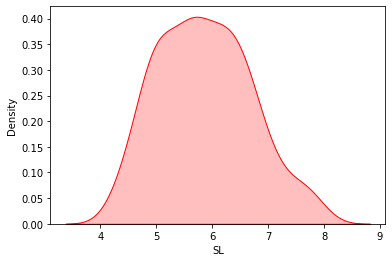

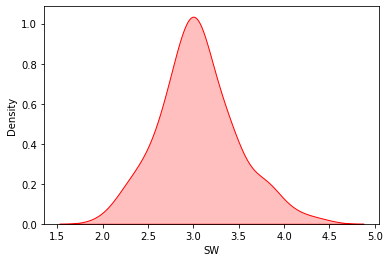

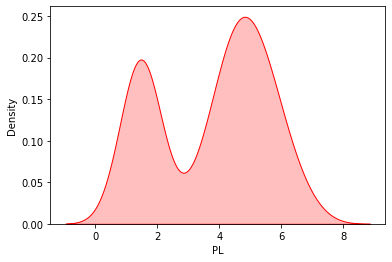

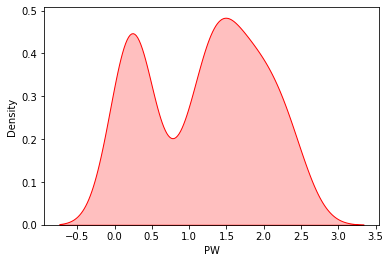

In [898]:

freqgraph=irisData.select_dtypes(include=['float'])
for i in freqgraph:
    sns.kdeplot(irisData[i], color='red', shade=True)
    plt.show()

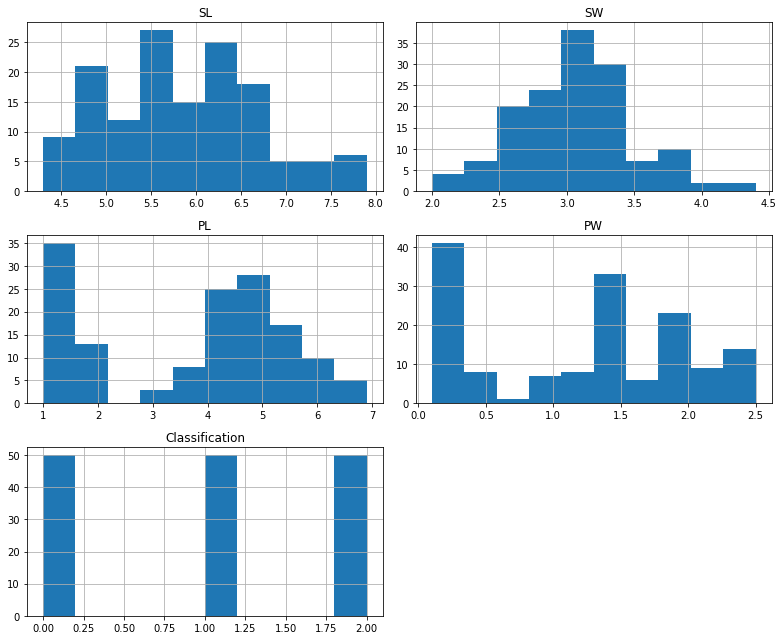

In [899]:
freqgraph=irisData.select_dtypes(include=['float','int64'])
freqgraph.hist(figsize=(11,9))
plt.tight_layout()
plt.show()

####Obsevations
- Dataset has 10 rows and 5 features
- There are null values in the dataset.

#2. Do necessary pre-processing steps.

###Handling the missing values in the features SL, SW, PL with median

In [900]:
irisData['SL']=irisData['SL'].fillna(irisData['SL'].median())

In [901]:
irisData.isna().sum()

SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [902]:
irisData['SW']=irisData['SW'].fillna(irisData['SW'].median())

In [903]:
irisData.isna().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

In [904]:
irisData['PL']=irisData['PL'].fillna(irisData['PL'].median())

In [905]:
irisData.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

All missing values are filled

###Cheking the outliers in the features

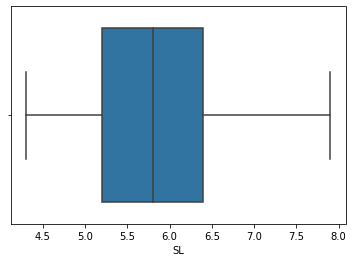

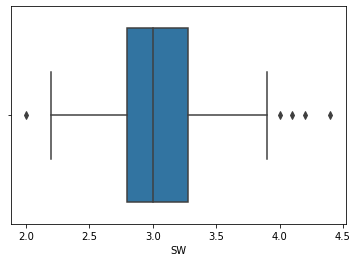

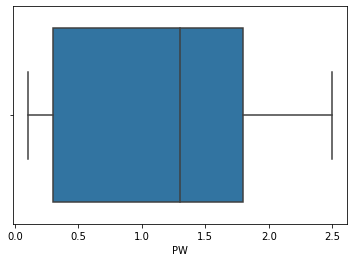

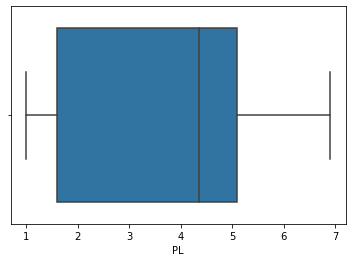

In [906]:
for i in ['SL','SW','PW','PL']:
  sns.boxplot(x=irisData[i])
  plt.show()

From the boxplot, it is clear that there are outliers in the feature 'SW'.

###Handling Outliers

In [907]:
Q1=np.percentile(irisData['SW'],25, interpolation ='midpoint')
Q2=np.percentile(irisData['SW'],50, interpolation ='midpoint')
Q3=np.percentile(irisData['SW'],75, interpolation ='midpoint')

In [908]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [909]:
IQR=Q3-Q1

In [910]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [911]:
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [912]:
outlier=[]
for x in irisData['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [913]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [914]:
ind1 =irisData['SW'][(irisData['SW']<low_lim)|(irisData['SW']>up_lim)].index

In [915]:
ind1

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [916]:
irisData.drop([14, 15, 32, 33, 60],inplace=True)

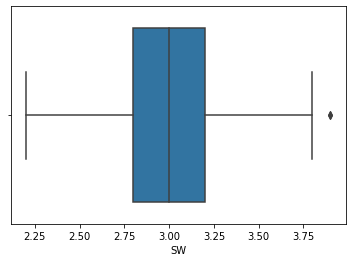

In [917]:
sns.boxplot(x=irisData['SW'])

#3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [918]:
#Splitting the data
y=irisData['Classification']
X=irisData.drop(['Classification'],axis=1)

In [919]:
print(X.shape)
print(y.shape)

(145, 4)
(145,)


In [920]:
from sklearn.model_selection import train_test_split
#split the Dataset into train and test
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(108, 4)
(108,)
(37, 4)
(37,)


##Implementing Logistic Regression

In [921]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred= logit_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [922]:
y_test[:]


74     1
145    2
29     0
21     0
46     0
122    2
131    2
113    2
89     1
20     0
12     0
59     1
133    2
83     1
78     1
40     0
117    2
138    2
105    2
106    2
99     1
141    2
11     0
71     1
35     0
49     0
55     1
81     1
116    2
9      0
4      0
28     0
125    2
130    2
18     0
10     0
123    2
Name: Classification, dtype: int64

In [923]:
y_pred[:]

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2])

In [924]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [925]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.8918918918918919
Precision is: 0.8834498834498835
Recall is : 0.8915343915343915
f1 score is: 0.8839506172839506


In [926]:
confusion_matrix(y_test, y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]])

##Implementing KNN

In [927]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(2,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [928]:
acc_values

[0.8918918918918919,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649]

Text(0, 0.5, 'accuracy')

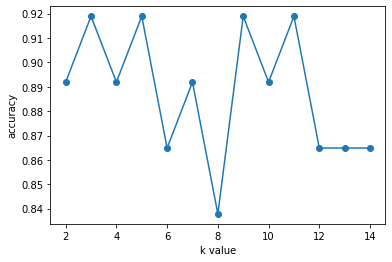

In [929]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [930]:
classifier=KNeighborsClassifier(n_neighbors=6, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [931]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.8648648648648649
Precision is: 0.861111111111111
Recall is : 0.8677248677248678
f1 score is: 0.8570071903405238


In [932]:
confusion_matrix(y_test, y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]])

In [933]:
irisData.describe()

,SL,SW,PL,PW,Classification
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897,1.027586
std,0.816827,0.374354,1.712265,0.758219,0.816027
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.200000,5.100000,1.800000,2.000000
max,7.900000,3.900000,6.900000,2.500000,2.000000


##Standard Scaling

In [934]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [935]:
logit_model =LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred= logit_model.predict(X_test)

In [936]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.9459459459459459
Precision is: 0.9391534391534391
Recall is : 0.9391534391534391
f1 score is: 0.9391534391534391


All values are improved after scaling.
- Accuracy is: 0.9459459459459459
- Precision is: 0.9391534391534391
- Recall is : 0.9391534391534391
- f1 score is: 0.9391534391534391

In [937]:
t=[]
t.append(['Logistic Regression',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


In [938]:
acc_values=[]
neighbors=np.arange(3,14)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

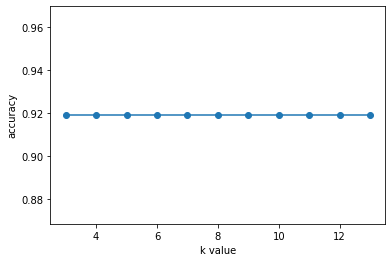

In [939]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [940]:
classifier=KNeighborsClassifier(n_neighbors=6, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

In [941]:
print("Accuracy is:", accuracy_score(y_test, y_pred))
print("Precision is:", precision_score(y_test, y_pred,average='macro'))
print("Recall is :", recall_score(y_test,y_pred,average='macro'))
print("f1 score is:", f1_score(y_test, y_pred,average='macro'))

Accuracy is: 0.918918918918919
Precision is: 0.9076923076923077
Recall is : 0.9153439153439153
f1 score is: 0.9103313840155945


After scaling all values are improved.
- Accuracy is: 0.918918918918919
- Precision is: 0.9076923076923077
- Recall is : 0.9153439153439153
- f1 score is: 0.9103313840155945

In [942]:
t.append(['KNN',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


In [943]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]])

## Implementing Decision Tree Classifier

In [944]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

In [945]:
print('Accuracy on Decision tree model is', accuracy_score(y_test, y_pred))

Accuracy on Decision tree model is 0.9459459459459459


In [946]:
y_test.value_counts()

2    14
0    14
1     9
Name: Classification, dtype: int64

In [947]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 12]])

Standard Scaling


In [948]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


##Implementing SVM

In [949]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)

In [950]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.972972972972973
precision is : 0.9777777777777779
recall is : 0.9629629629629629
F1 score is : 0.9688979039891819


In [951]:
t.append(['SVM',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


### Polinomial SVM

In [952]:
svm_poly=SVC(kernel='poly', degree=3)

In [953]:
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [954]:
y_pred=svm_linear.predict(X_test)

In [955]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.972972972972973
precision is : 0.9777777777777779
recall is : 0.9629629629629629
F1 score is : 0.9688979039891819


In [956]:
t.append(['polynomial svm',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


### Radial SVM

In [957]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train, y_train)

SVC()

In [958]:
y_pred=svm_linear.predict(X_test)
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.972972972972973
precision is : 0.9777777777777779
recall is : 0.9629629629629629
F1 score is : 0.9688979039891819


In [959]:
t.append(['Radial SVM',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


##Random Forest

In [960]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [961]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.972972972972973
precision is : 0.9777777777777779
recall is : 0.9629629629629629
F1 score is : 0.9688979039891819


In [962]:
t.append(['Random Forest',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


In [963]:
#Gradient Booster
from sklearn.ensemble import GradientBoostingClassifier
gm=GradientBoostingClassifier()
gm.fit(X_train,y_train)
y_pred=gm.predict(X_test)

In [964]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.972972972972973
precision is : 0.9666666666666667
recall is : 0.9761904761904763
F1 score is : 0.9701104613385315


In [965]:
t.append(['Gradient Booster',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


In [966]:
#Extreme Gradient Booster
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

In [967]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9391534391534391
recall is : 0.9391534391534391
F1 score is : 0.9391534391534391


In [968]:
t.append(['Extreme Gradient Booster',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),round(precision_score(y_test,y_pred,average='macro'),5),round(recall_score(y_test,y_pred,average='macro'),5)])


In [969]:
df = pd.DataFrame(t, columns = ['Algorithms', 'F1-Score','accuracy','precision','recall'])
df

,Algorithms,F1-Score,accuracy,precision,recall
0,Logistic Regression,0.93915,0.94595,0.93915,0.93915
1,KNN,0.91033,0.91892,0.90769,0.91534
2,SVM,0.96890,0.97297,0.97778,0.96296
3,polynomial svm,0.96890,0.97297,0.97778,0.96296
4,Radial SVM,0.96890,0.97297,0.97778,0.96296
5,Random Forest,0.96890,0.97297,0.97778,0.96296
6,Gradient Booster,0.97011,0.97297,0.96667,0.97619
7,Extreme Gradient Booster,0.93915,0.94595,0.93915,0.93915


####From the table, we can see that Gradient Booster has highest F1 score (0.97011) and accuracy(0.97297) than other algorithms.